## Configuro notebook

In [30]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Importo librerias

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

## Leo datos

In [10]:
df = pd.read_csv(DATOS_DIR+'beijing_air_quality.csv', index_col='datetime')
display(df.head())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2015-01-02 22:00:00,16151,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.0,SW,0.7,Aotizhongxin
2015-01-02 23:00:00,16152,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.0,NNW,0.7,Aotizhongxin
2015-01-03 00:00:00,16153,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.0,SSE,0.4,Aotizhongxin
2015-01-03 01:00:00,16154,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.0,ESE,0.4,Aotizhongxin
2015-01-03 02:00:00,16155,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,0.0,NE,1.1,Aotizhongxin


## Grafico atributo objetivo

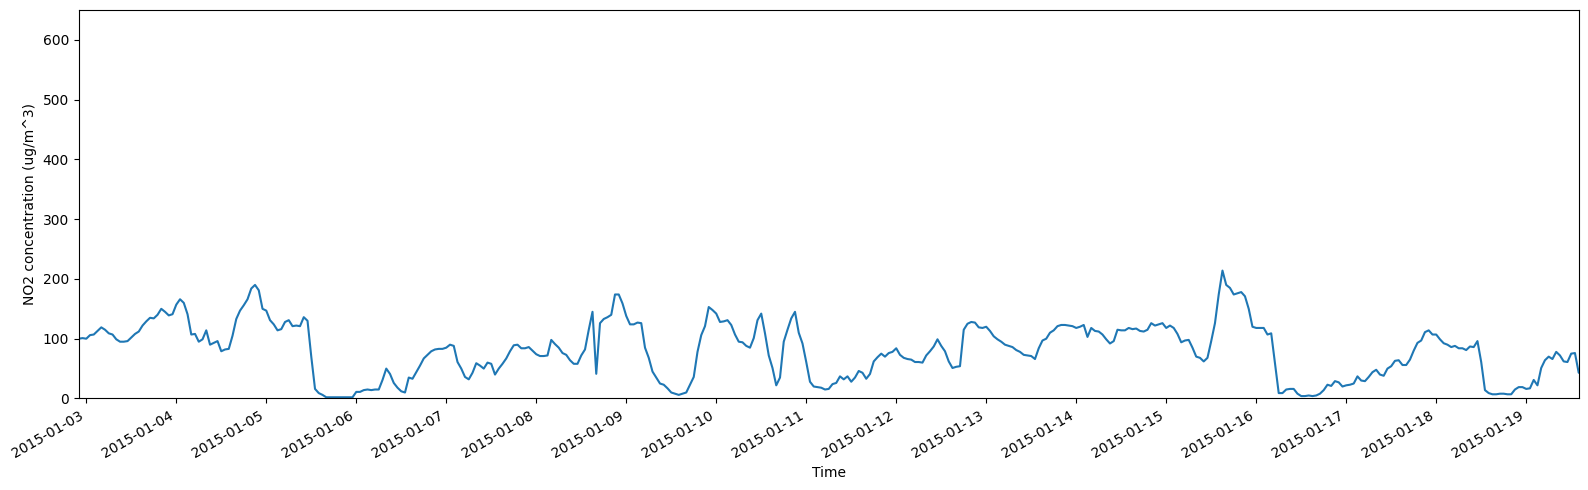

In [11]:
fig, ax = plt.subplots(figsize = (16,5))

ax.plot(df['NO2'])
ax.set_xlabel('Time')
ax.set_ylabel('NO2 concentration (ug/m^3)')

plt.xticks(np.arange(2, 400, 24), ['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19'])
plt.ylim(0, 650)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

## Analisis de atributos

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,18914.0,25607.500000,5460.145831,16151.0,20879.250,25607.5,30335.75,35064.0
PM2.5,18914.0,79.407220,83.816615,3.0,19.000,54.0,107.00,898.0
PM10,18914.0,103.687485,95.725767,3.0,33.225,78.0,143.00,984.0
SO2,18914.0,13.201725,17.090182,2.0,2.000,7.0,16.00,341.0
NO2,18914.0,55.560272,37.834273,2.0,26.000,47.0,77.00,290.0
CO,18914.0,1324.737573,1351.213878,100.0,500.000,900.0,1600.00,10000.0
O3,18914.0,61.602319,58.980450,2.0,13.000,49.0,87.00,423.0
TEMP,18914.0,12.741331,11.751367,-16.8,2.000,13.0,23.10,38.8
PRES,18914.0,1013.480721,10.470266,987.5,1004.900,1013.2,1022.10,1042.0
DEWP,18914.0,1.399363,13.830859,-35.3,-10.100,1.3,14.00,27.3


In [13]:
cols_to_drop = ['RAIN', 'wd', 'No', 'station']

df = df.drop(cols_to_drop, axis=1)

df.shape

(18914, 10)

## Función para generar las particiones preservando las características de la serie de tiempo

In [14]:
def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df['NO2'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (15131,)
Tamaño set de validación: (1891,)
Tamaño set de prueba: (1892,)


## Dibujemos los subsets

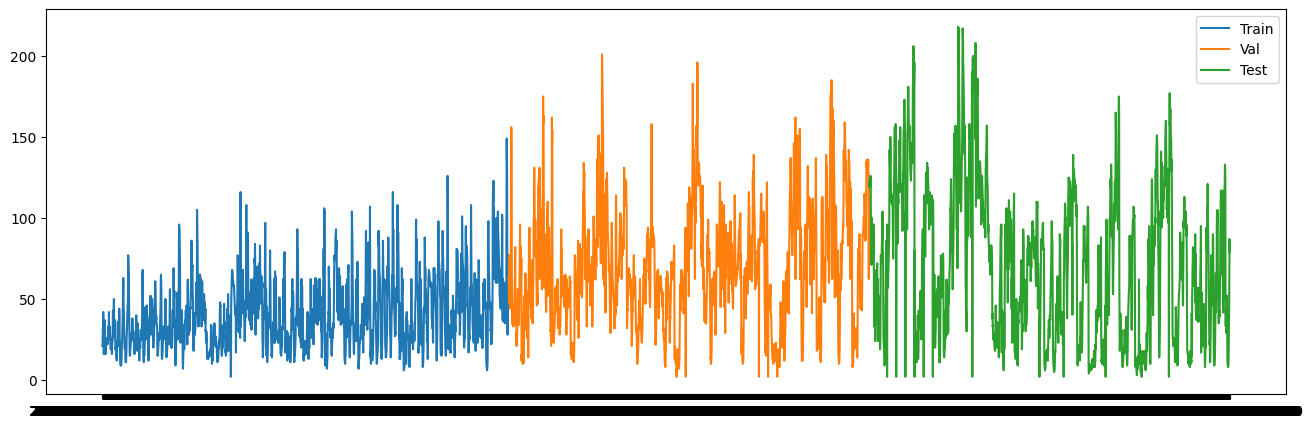

In [15]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[13000:-1], label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

In [16]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

## Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños

In [17]:
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (15106, 24, 1), y_tr: (15106, 1, 1)
Set de validación - x_vl: (1866, 24, 1), y_vl: (1866, 1, 1)
Set de prueba - x_ts: (1867, 24, 1), y_ts: (1867, 1, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

In [19]:
# Arreglos que contendrán los datasets escalados
x_tr_s = np.zeros(x_tr.shape)
x_vl_s = np.zeros(x_vl.shape)
x_ts_s = np.zeros(x_ts.shape)
y_tr_s = np.zeros(y_tr.shape)
y_vl_s = np.zeros(y_vl.shape)
y_ts_s = np.zeros(y_ts.shape)

x_tr_s[:,:,0] = scaler.fit_transform(x_tr[:,:,0])
x_vl_s[:,:,0] = scaler.transform(x_vl[:,:,0])
x_ts_s[:,:,0] = scaler.transform(x_ts[:,:,0])

# Escalamiento Ys
y_tr_s[:,:,0] = scaler.fit_transform(y_tr[:,:,0])
y_vl_s[:,:,0] = scaler.transform(y_vl[:,:,0])
y_ts_s[:,:,0] = scaler.transform(y_ts[:,:,0])

In [20]:
# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')

Min x_tr/x_vl/x_ts sin escalamiento: 2.0/2.0/2.0
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-1.0/-1.0

Min y_tr/y_vl/y_ts sin escalamiento: 2.0/2.0/2.0
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-1.0/-1.0

Max x_tr/x_vl/x_ts sin escalamiento: 290.0/201.0/218.0
Max x_tr/x_vl/x_ts con escalamiento: 1.0/0.3819444444444444/0.5

Max y_tr/y_vl/y_ts sin escalamiento: 290.0/201.0/218.0
Max y_tr/y_vl/y_ts con escalamiento: 1.0/0.3819444444444444/0.5


## Creación del modelo

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
#tf.config.experimental.enable_op_determinism()

# El modelo

N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
#INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

INPUTS = x_tr_s.shape[1]  # cantidad de elementos de cada ventana

modelo = Sequential()
modelo.add(Dense(1, input_dim=INPUTS, activation='linear'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s[:,:,0],
    y = y_tr_s[:,:,0],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
60/60 - 1s - loss: 1.2229 - val_loss: 0.9998 - 529ms/epoch - 9ms/step
Epoch 2/80
60/60 - 0s - loss: 1.1714 - val_loss: 0.9590 - 103ms/epoch - 2ms/step
Epoch 3/80
60/60 - 0s - loss: 1.1210 - val_loss: 0.9188 - 105ms/epoch - 2ms/step
Epoch 4/80
60/60 - 0s - loss: 1.0711 - val_loss: 0.8782 - 103ms/epoch - 2ms/step
Epoch 5/80
60/60 - 0s - loss: 1.0209 - val_loss: 0.8381 - 102ms/epoch - 2ms/step
Epoch 6/80
60/60 - 0s - loss: 0.9711 - val_loss: 0.7983 - 99ms/epoch - 2ms/step
Epoch 7/80
60/60 - 0s - loss: 0.9216 - val_loss: 0.7587 - 109ms/epoch - 2ms/step
Epoch 8/80
60/60 - 0s - loss: 0.8722 - val_loss: 0.7197 - 115ms/epoch - 2ms/step
Epoch 9/80
60/60 - 0s - loss: 0.8232 - val_loss: 0.6811 - 109ms/epoch - 2ms/step
Epoch 10/80
60/60 - 0s - loss: 0.7746 - val_loss: 0.6431 - 112ms/epoch - 2ms/step
Epoch 11/80
60/60 - 0s - loss: 0.7266 - val_loss: 0.6056 - 117ms/epoch - 2ms/step
Epoch 12/80
60/60 - 0s - loss: 0.6790 - val_loss: 0.5691 - 106ms/epoch - 2ms/step
Epoch 13/80
60/60 - 0s - l

## Graficar curvas de entrenamiento y validación para verificar que no existe overfitting

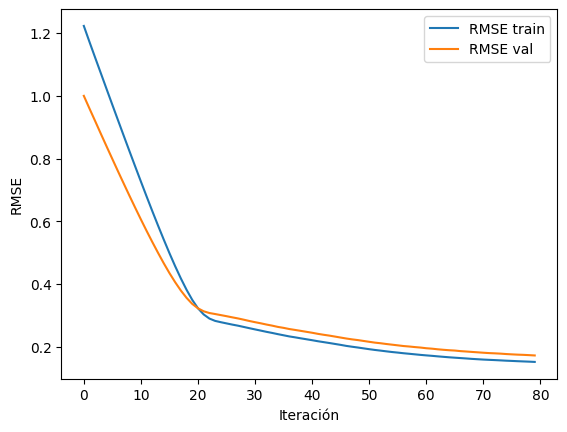

In [23]:
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

## Cálculo de rmses para train, val y test

In [24]:
rmse_tr = modelo.evaluate(x=x_tr_s[:,:,0], y=y_tr_s[:,:,0], verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s[:,:,0], y=y_vl_s[:,:,0], verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s[:,:,0], y=y_ts_s[:,:,0], verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.140
  RMSE val:	 0.167
  RMSE test:	 0.191


In [25]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

## Calcular predicciones sobre el set de prueba

In [26]:
y_ts_pred = predecir(x_ts_s[:,:,0], modelo, scaler)

In [27]:
y_ts_pred.shape

(1867,)

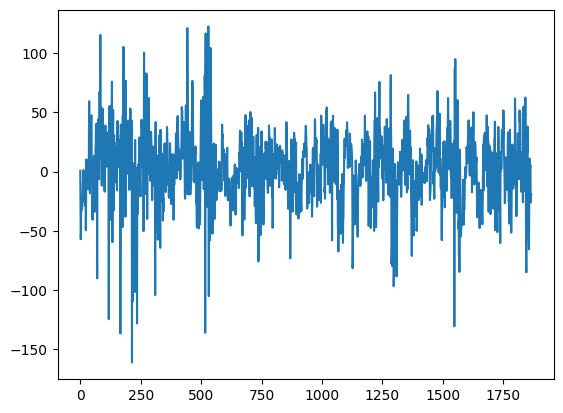

In [28]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

# Dibujemos los subsets

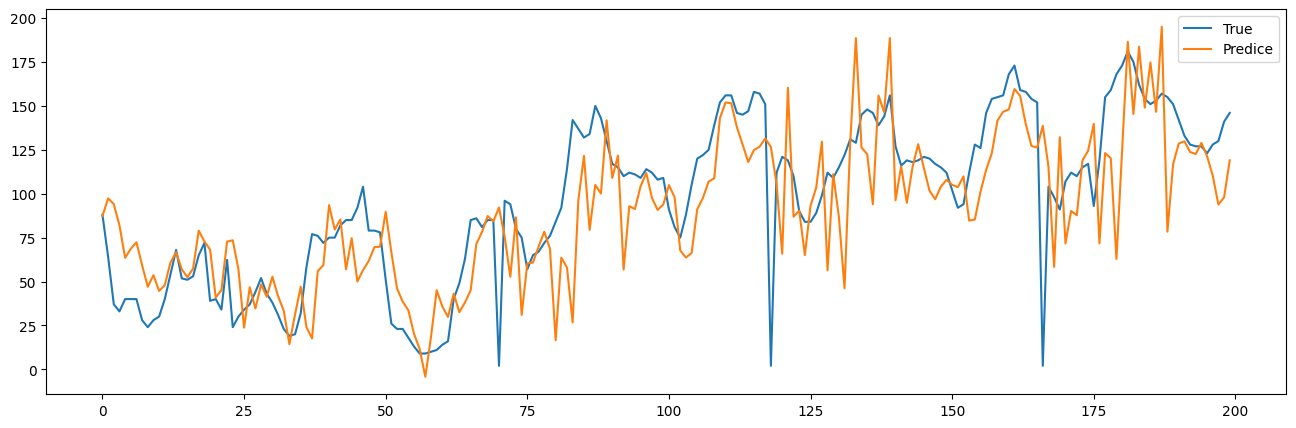

In [29]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(y_ts.flatten()[:200], label='True')
ax.plot(y_ts_pred[:200], label='Predice')
plt.legend();